<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Dependence and correlations
- Sampling from Gaussians 
- Method of Least Squares

<hr/>

<h1><font color="darkblue">Bivariate and Multivariate</font></h1>

### Dependence
- Consider random variables $X$, $Y\in\mathbb{R}$

> We can look at them separately but ...
>
> Are they "related" at all?

- Dependent variables

>$\displaystyle P(X, Y) \neq P(X)\,P(Y)$ 
> 
>More on this later...

### Covariance

- Definition 

>$\displaystyle \textrm{cov}(X,Y)=\mathbb{E}\Big[\big(X-\mathbb{E}[X]\big)\big(Y-\mathbb{E}[Y]\big)\Big]$  
>
> Other notations: $\mathrm{C}_{X,Y}$, $\sigma(X,Y)$, ...

- Sample covariance

>$\displaystyle C = \frac{1}{N\!-\!1}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})$

### Quiz

1) If $X$ and $Y$ are independent, are they also uncorrelated?

        [ ] Yes      [ ] No
        
2) If $X$ and $Y$ are uncorrelated, are they also independent?

        [ ] Yes      [ ] No

### Correlation

>$\displaystyle \textrm{corr}(X,Y)=\frac{\textrm{cov}(X,Y)}{\sigma_X\,\sigma_Y}$  

- For example<br>
<img src="files/600px-Correlation_examples2.svg.png" width=500 align="left">


### Vector Notation

- Let $\boldsymbol{V}$ represent the 2-vector of random scalar variables $X$ and $Y$

>$\boldsymbol{V} = \begin{pmatrix}X\\Y\end{pmatrix}$

- Mean

>$\displaystyle \mathbb{E}[\boldsymbol{V}] = \begin{pmatrix}\mathbb{E}[X]\\\mathbb{E}[Y]\end{pmatrix} = \begin{pmatrix}\mu_X\\\mu_Y\end{pmatrix}$

- Covariance matrix is symmetric

>$\displaystyle \Sigma_{\boldsymbol{V}} = \mathbb{E}\Big[\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)\big(\boldsymbol{V}\!-\!\mathbb{E}[\boldsymbol{V}]\big)^T\Big]$ $ = \left( \begin{array}{ccc}
\sigma_X^2 & \mathrm{C}_{X,Y}  \\
\mathrm{C}_{Y,X} & \sigma_Y^2  \end{array} \right)$
>
> Same generalization of variance works in any dimensions



### Bivariate Normal Distribution
- Independent and uncorrelated

>$ \displaystyle {\cal N}(x,y;\mu_x,\mu_y,\sigma_x,\sigma_y) = \frac{1}{2 \pi \sigma_x \sigma_y}\ \exp\left[-\frac{(x\!-\!\mu_x)^2}{2\sigma_x^2} -\frac{(y\!-\!\mu_y)^2}{2\sigma_y^2} \right] $

- In general, for 2-vector $\boldsymbol{x}$

>$ \displaystyle{\cal N}(\boldsymbol{x};\boldsymbol{\mu},\Sigma) = \frac{1}{2\pi \lvert \Sigma \rvert^{\frac{1}{2}} }\ \exp\left[-\frac{1}{2} (\boldsymbol{x}\!-\!\boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x}\!-\!\boldsymbol{\mu})\right]$
>
> where $\lvert \Sigma \rvert$ is the determinant - other notation $\det\Sigma$ or $\det\!\left(\Sigma\right)$

- Uncorrelated if

>$ \displaystyle \Sigma = \left( \begin{array}{ccc}
\sigma_X^2 & 0  \\
0 & \sigma_Y^2  \end{array} \right)$

### Multivariate Normal Distribution

- In $k$ dimensions - not bold but $k$-vectors

<!--
>$ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{(2\pi)^{k} \lvert \Sigma \rvert} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$
-->

>$ \displaystyle{\cal N}(x;\mu,\Sigma) = \frac{1}{\sqrt{\lvert 2\pi\Sigma \rvert} }\ \exp\left[-\frac{1}{2} (x\!-\!\mu)^T \Sigma^{-1} (x\!-\!\mu)\right]$

### Detour: Another way to Sample from Gaussians
- Uncorrelated ${\cal N}(0,I)$: Box-Muller transform 

> Using 2 uniform randoms between 0 and 1
>
>$ Z_1 = \sqrt{-2\ln U_1}\,\cos\big(2\pi U_2\big)$ 
>
>$ Z_2 = \sqrt{-2\ln U_1}\,\sin\big(2\pi U_2\big)$ 

- Tranform: scale, rotate, shift


In [1]:
%pylab inline 
from scipy.stats import norm as gaussian

Populating the interactive namespace from numpy and matplotlib


(2,)


array([2.01582   , 4.99347335])

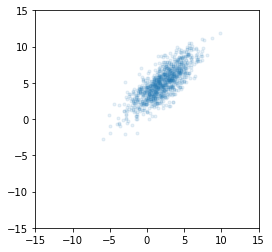

In [2]:
# generate many 2D (column) vectors
X = gaussian.rvs(0,1,(2,1000))
X[0,:] *= 3  # scale axis 0
f = +pi/4    # rotate by f
R = array([[cos(f),-sin(f)],
           [sin(f), cos(f)]]) 
V = R.dot(X)
V += np.array([[2],
               [5]]) # shift with a vector
# plot on square figure
figure(figsize=(4,4)); a=15; xlim(-a,a); ylim(-a,a)
plot(V[0,:],V[1,:], '.', alpha=0.1)

# sample average
averages = mean(V, axis=1)
print (averages.shape)
averages

In [3]:
#avg = averages.reshape(averages.size,1)
avg = averages[:,np.newaxis] 
print ("Average: ")
print (avg)

# sample covariance matrix
C = (V-avg) @ (V-avg).T / (V.shape[1]-1) 
print ("Cov:")
print (C) 

Average: 
[[2.01582   ]
 [4.99347335]]
Cov:
[[5.22411911 4.04552015]
 [4.04552015 4.95598936]]


<h1><font color="darkblue">Method of Least Squares</font></h1>

### The Idea

- Fit a model to training set $\big\{ (x_i, y_i) \big\}$

> Parameterized function $f(x;\theta)$, where $\theta$ can represent multiple parameters

- Minimize the mean or sum of square errors or residuals (SSE, SSR, MSE, MSR?)

> Residual   
>$r_i(\theta) = y_i - f(x_i;\theta)$
>
> Estimation  
>$\displaystyle \hat{\theta} = \arg\min_{\theta} \sum_i \big[y_i-f(x_i;\theta)\big]^2$
 
- Optimization is simple for certain models

### The Simplest Case
- Fitting a constant? Model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \big(y_i\!-\!\mu\big)^2$

- Derivative $C'= dC \big/ d\mu$ vanishes at solution $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i=1}^N \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i=1}^N y_i - N \hat{\mu} = 0 $
>
>$\displaystyle \hat{\mu} = \frac{1}{N}\sum_{i=1}^N y_i \ \ \ \ \ $  -  average

### Heteroscedasticity
- Same model with $f(x;\mu)=\mu$

>$\displaystyle C(\mu) = \sum_{i=1}^N \frac{\big(y_i\!-\!\mu\big)^2}{\sigma_i^2} $
>
> with  $\ w_i=1 \big/ \sigma_i^2$
>
>$\displaystyle  C(\mu) = \sum_{i=1}^N w_i\big(y_i\!-\!\mu\big)^2 $

- Derivative $C'= dC \big/ d\mu$ vanishes at $\hat{\mu}$

>$\displaystyle C'(\hat{\mu}) = 0$
>
>$\displaystyle 2\sum_{i} w_i \big(y_i\!-\!\hat{\mu}\big)(-1)=0$
>
>$\displaystyle \sum_{i} w_i y_i - \hat{\mu}\sum_{i} w_i  = 0 $
>
>$\displaystyle \hat{\mu} = \frac{\sum w_i y_i}{\sum w_i} \ \ \ \ \ \ $ - weighted average

### Simple Fitting
- A linear model with $\boldsymbol{\theta}=(a,b)^T$ parametrization $f(x;\boldsymbol{\theta}) = a + b\,x$
  
>$\displaystyle \hat{\boldsymbol\theta} = \arg\min \sum_i \big[y_i-(a + b\,x_i)\big]^2$

- Derivatives w.r.t. $a$ and $b$ should vanish

> We have 2 variables and 2 equations
> <br/><br/>
> Quadratic becomes linear $\rightarrow$ analytic solution!

#### Unhomework

1. Derive the best fit parameters of $(a,b)$

### Linear Regression
- A linear combination of known $\phi_k(\cdot)$ functions (basis functions)

>$\displaystyle f(x;\boldsymbol{\beta}) = \sum_{k=1}^K \beta_k\, \phi_k(x) $
> <br/><br/>
> It's a dot product
> <br/><br/>
>$\displaystyle f(x;\boldsymbol{\beta}) = \boldsymbol\beta^T \boldsymbol\phi(x)$ 
> <br/><br/>
>with $\boldsymbol{\beta}=(\beta_1,\dots,\beta_K)^T$


- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K \beta_k\, \phi_k(x_i) \right\}^2$


- Introducing matrix $X$ with components

>$\displaystyle X_{ik} = \phi_k(x_i) $

- Linear in $\boldsymbol{\beta}$, cost function is quadratic

>$\displaystyle C = \sum_{i=1}^N \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k\right\}^2$




### Minimization

- Partial derivatives
  

>$\displaystyle \frac{\partial{}C}{\partial{}\beta_l} = 2\sum_i \left\{ y_i - \sum_{k=1}^K X_{ik}\beta_k \right\} 
\left[ -\frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} \right]$
> <br/><br/>
> and
> <br/><br/>
>$\displaystyle \frac{\partial f(x_i;\boldsymbol{\beta})}{\partial \beta_l} =\sum_k \frac{\partial{}\beta_k}{\partial{}\beta_l}\,\phi_k(x_i) = \phi_l(x_i) = X_{il}$
> <br/><br/>
> **Note:** $\partial{}\beta_k \big/ \partial{}\beta_l=\delta_{kl}$ Kronecker delta

### Detour: The Kronecker Delta

- Definition

>$ \delta_{kl} = \left\{ \begin{array}{ll}
         1 & \mbox{if $k=l$}\\
         0 & \mbox{if $k\neq{}l$}\end{array} \right.  $
         
- Useful to remember

>$ \displaystyle \sum_l \delta_{kl}\,a_l = a_k$
> <br/><br/>
> Cf. identity matrix:
>$ I\, \boldsymbol{a} = \boldsymbol{a}$

### Result

- At the optimum we have


>$\displaystyle \sum_i \left\{ y_i - \sum_{k} \hat\beta_k\, \phi_k(x_i) \right\}\, \phi_l(x_i)  = 0$
> <br/><br/>
>$\displaystyle \sum_i \left\{ y_i - \sum_{k} X_{ik}\hat\beta_k\ \right\}\, X_{il}  = 0$
> <br/><br/>
>$\displaystyle \sum_i X_{il} y_i  - \sum_i \sum_k  X_{il} X_{ik} \hat{\beta}_k = 0$
> <br/><br/>
>$\displaystyle \sum_i  X_{il} y_i = \sum_k \left(\sum_i X_{il} X_{ik}\right) \hat{\beta}_k$

- I.e.,

>$\displaystyle X^T y = X^T X \hat{\beta} $
> <br/><br/>
>$\displaystyle \hat\beta = (X^T X)^{-1} X^T y = X^+ y$

- See **Moore-Penrose pseudoinverse**, **generalized inverse**

- See also **Singular Value Decomposition**

### Hat matrix

- Looking at the definition of $X$ we see that the model at $\hat{\beta}$ predicts $\hat{y}_i$ values

>$\displaystyle \hat{y} = X\,\hat\beta = X\,(X^T X)^{-1} X^T y $
> <br/><br/>
> which is
> <br/><br/>
>$\displaystyle \hat{y}  = H\,y\ \ \ $
> with 
>$\ \ \displaystyle {H} = X\,(X^T X)^{-1} X^T$

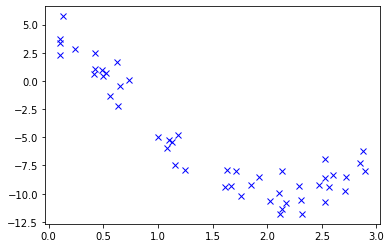

In [4]:
# generate sample with error
x = 3 * random.rand(50) # between 0 and 3
e = 1 * random.randn(x.size) # noise
#y = (0.1*x**3 + 0.5*x**2 + 2*x + 1) + e;  plot(x,y,'bo');
y = 10*cos(x+1) + e;  plot(x,y,'bx');

array([ 1.98552993, -4.87756733])

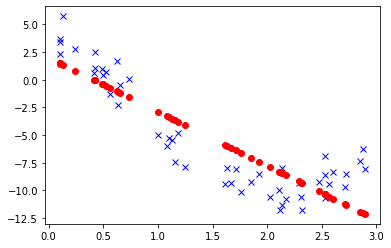

In [5]:
# linear model f(x) = b0 + b1 x
X = np.ones((x.size,2));
X[:,1] = x

Xpinv = dot(inv(dot(X.T,X)),X.T)
bHat = dot(Xpinv,y)
yHat = dot(X,bHat)

plot(x,y,'bx'); plot(x,yHat,'ro'); bHat

array([ 1.98552993, -4.87756733])

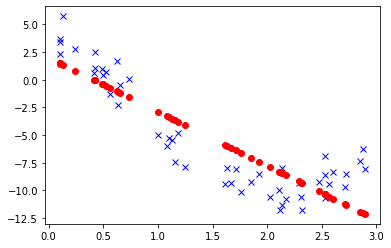

In [6]:
# same using methods
Xpinv = inv(X.T.dot(X)).dot(X.T)
bHat = Xpinv.dot(y)
yHat = X.dot(bHat)

plot(x,y,'bx'); plot(x,yHat,'ro'); bHat

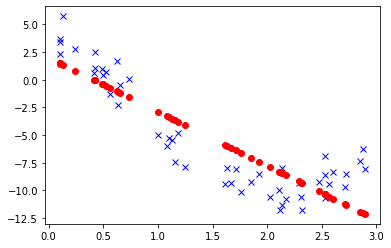

In [7]:
# same again with pinv() and the Hat matrix
H = X.dot(linalg.pinv(X)) 
yHat = H.dot(y)

plot(x,y,'bx'); plot(x,yHat,'ro');

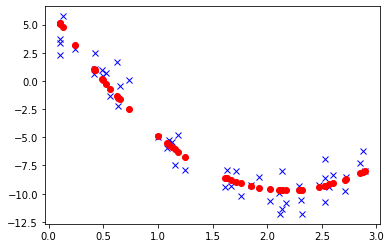

In [8]:
# linear model f(x) = b0 + b1 x + b2 * x^2
X = np.ones((x.size,3));
X[:,1] = x # partials wrt. b1
X[:,2] = x*x # wrt. b2

# sames as before
bHatQ = linalg.pinv(X).dot(y)
yHatQ = X.dot(bHatQ)

# or like this
H = dot(X,linalg.pinv(X))
yHatQ = dot(H,y)

plot(x,y,'bx'); plot(x,yHatQ,'ro');

### Unhomework

1. Fit a 3rd order polynomial to the same data

1. Fit $f(x;\beta_0,\beta_1) = \beta_0\sin(x) + \beta_1\cos(x)$

1. Evaluate the best fits on a grid of 1000 equally-spaced points in $[-1,4]$

1. Plot them in one figure